In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fontconfig error: Cannot load default config file


In [2]:
m_size = 30 * 7 + 1
average_cast_time = 2.72
buff_duration = 20
resists_to_drop = np.floor(buff_duration / average_cast_time)
#Chance to resist a cast 
fire_resistance = 275
p = fire_resistance / 315 * 0.75

# Change if testing max amount of stacks reached
# Add a "sink" to  the matrix so that if stacks reach 
# this threshold, they are "stuck" forever. 
max_stack_tester = 99
max_stack_idx = max_stack_tester * 7 + 1

a = np.zeros((m_size,m_size))
a[0,1] = p
a[0,7] = 1-p
for i in range(1, m_size-1):
    if(i == max_stack_idx):
        print(i)
        a[i,i]=1.0
    else:
        if((i+1) % 7 == 0):
            a[i,0] = p
            a[i, i+1] = 1-p
        else:
            a[i, i+1] = p
            idx = int(np.ceil((i+1)/7) * 7)
            a[i, idx] = 1 - p
a[m_size-1,m_size-1] = 1

In [4]:
res = np.zeros((m_size,m_size))
a_new = np.eye((m_size))

num_cast = 50
for i in range(0,num_cast):
    a_new = np.matmul(a_new, a)
    #print(np.sum(a_new[0,max_stack_idx:]))
    res += a_new

In [5]:
max_stacks = int(m_size/7) + 1
start = np.zeros((int(m_size/7) + 1 ,1))
start[0] = 1.0

In [6]:
cdf = np.zeros(max_stacks)
cdf[0] = np.sum(res[0,0:7])
for i in range(1,max_stacks):
    cdf[i] = cdf[i-1] + np.sum(res[0,7*i:(7*i+7)])
    
cdf = cdf / num_cast

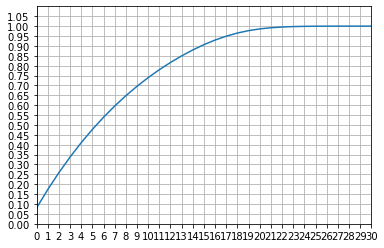

In [7]:
plt.plot(cdf)
plt.grid(True, which="both", ls="-")
plt.xlim((5,25))
plt.ylim((0.0, 1.1))
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.xticks(np.arange(0, 31))
plt.show()

In [8]:
np.where(cdf<0.95)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),)

In [9]:
cdf275 = cdf

In [21]:
cdf315 = cdf

([<matplotlib.axis.XTick at 0x7f38f01cf970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

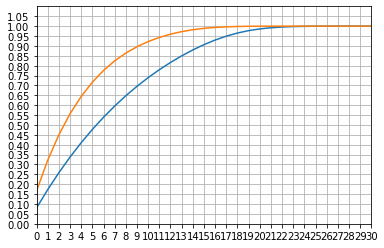

In [30]:
plt.plot(cdf275)
plt.plot(cdf315)
plt.grid(True, which="both", ls="-")
plt.xlim((5,25))
plt.ylim((0.0, 1.1))
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.xticks(np.arange(0, 31))

In [31]:
np.where(cdf315<0.95)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),)

In [32]:
np.where(cdf275<0.95)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),)